In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('../datasets/mnist_train.csv')
test_data = pd.read_csv('../datasets/mnist_test.csv')

In [3]:
data = np.array(train_data)
m, n = data.shape
np.random.shuffle(data)

In [4]:
# Creating development (validation) and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255   # Normalizing pixel values

In [5]:
# Creating Training Dataset from remaining
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255   # Normalizing pixel values
_,m_train = X_train.shape
Y_train

array([3, 5, 6, ..., 0, 6, 4], shape=(59000,))

In [6]:
def init_params():
  # Subtract 0.5 from each para. to keep the range b/w -0.5 to +0.5
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

In [7]:
def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def one_hot_encode(Y):
  one_hot = np.zeros((Y.size, Y.max() + 1))
  one_hot[np.arange(Y.size), Y] = 1
  one_hot = one_hot.T
  return one_hot

def derivative_ReLU(Z):
  return Z > 0

In [8]:
def forward_propogation(W1, b1, W2, b2, X):     # X is A0
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [9]:
# Define Gradient Descent & it's required functions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[2 4 2 ... 2 2 2] [3 5 6 ... 0 6 4]
0.1392542372881356
Iteration:  10
[0 8 2 ... 2 2 8] [3 5 6 ... 0 6 4]
0.1601186440677966
Iteration:  20
[0 8 2 ... 2 2 8] [3 5 6 ... 0 6 4]
0.213
Iteration:  30
[0 8 8 ... 2 2 5] [3 5 6 ... 0 6 4]
0.25354237288135595
Iteration:  40
[0 8 8 ... 0 2 5] [3 5 6 ... 0 6 4]
0.28538983050847455
Iteration:  50
[0 8 4 ... 0 2 3] [3 5 6 ... 0 6 4]
0.32896610169491525
Iteration:  60
[0 8 4 ... 0 3 3] [3 5 6 ... 0 6 4]
0.3795932203389831
Iteration:  70
[0 8 4 ... 0 3 3] [3 5 6 ... 0 6 4]
0.44977966101694916
Iteration:  80
[0 8 4 ... 0 8 3] [3 5 6 ... 0 6 4]
0.5169322033898305
Iteration:  90
[0 8 4 ... 0 5 3] [3 5 6 ... 0 6 4]
0.5555423728813559
Iteration:  100
[3 8 4 ... 0 5 9] [3 5 6 ... 0 6 4]
0.584406779661017
Iteration:  110
[3 8 4 ... 0 5 9] [3 5 6 ... 0 6 4]
0.6084406779661017
Iteration:  120
[3 8 4 ... 0 5 9] [3 5 6 ... 0 6 4]
0.6300508474576271
Iteration:  130
[3 8 4 ... 0 5 9] [3 5 6 ... 0 6 4]
0.6479491525423728
Iteration:  140
[3 8 4 ... 

In [11]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_prediction(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Label:", label)
    print("Prediction:", prediction)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Label: 3
Prediction: [3]


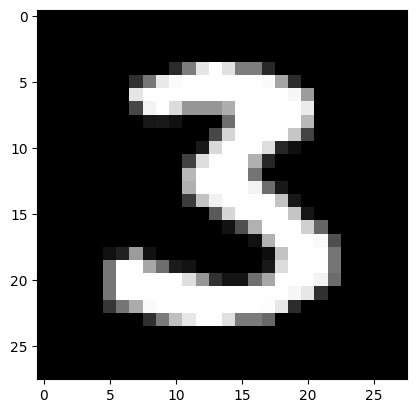

Label: 5
Prediction: [5]


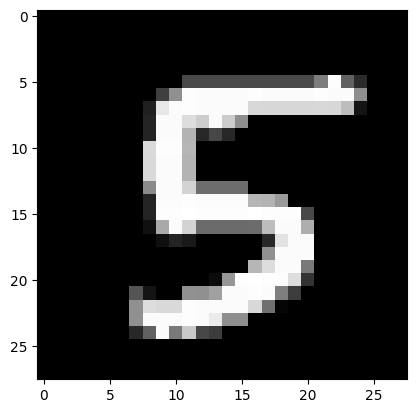

Label: 6
Prediction: [6]


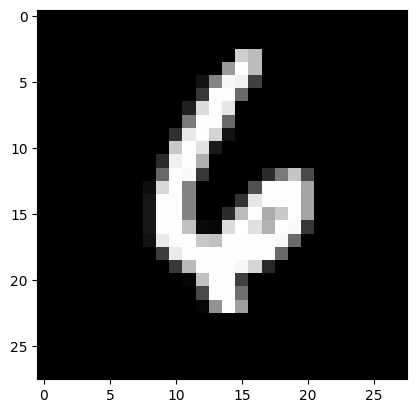

Label: 0
Prediction: [0]


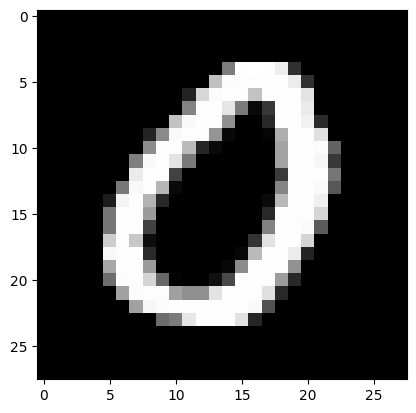

In [12]:
test_predictions(0, W1, b1, W2, b2)
test_predictions(1, W1, b1, W2, b2)
test_predictions(2, W1, b1, W2, b2)
test_predictions(3, W1, b1, W2, b2)

In [13]:
dev_predictions = make_prediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 7 0 9 5 6 5 0 7 1 8 6 6 8 9 9 7 4 9 1 6 9 5 7 0 5 7 6 9 3 7 4 2 1 9 8 6
 3 5 7 8 5 7 3 1 3 5 0 9 3 3 1 8 8 7 0 3 5 5 5 2 7 3 2 5 6 6 6 9 5 7 4 4 0
 1 7 0 5 4 5 1 8 9 3 4 6 4 5 5 7 9 1 1 0 1 1 8 5 1 1 3 8 6 5 5 4 4 9 1 7 6
 3 5 3 9 0 2 1 5 5 1 3 5 3 3 8 7 4 3 9 0 7 6 6 2 5 7 0 6 5 4 9 9 5 4 8 2 9
 8 1 1 9 6 6 5 0 7 0 9 6 6 6 7 9 8 7 8 8 9 8 8 6 5 4 1 8 5 5 8 5 8 6 3 3 6
 9 5 4 5 9 0 1 2 3 6 6 4 1 6 5 4 9 2 3 4 1 3 6 8 3 9 8 5 9 3 8 8 3 7 7 4 2
 4 1 8 0 6 6 1 7 5 7 6 5 5 3 5 9 4 4 2 1 0 4 2 0 3 4 2 1 3 1 5 6 1 4 4 3 2
 1 0 5 5 8 7 8 6 4 8 0 9 9 9 6 3 1 4 7 1 0 2 2 5 4 1 6 4 5 8 6 3 0 4 5 7 4
 2 1 7 9 9 9 2 7 8 3 9 2 8 2 9 0 3 8 8 3 9 1 7 1 8 1 9 5 7 6 5 0 4 0 5 5 2
 1 4 3 7 7 8 6 6 2 7 2 9 0 6 4 1 1 5 4 8 4 0 6 6 6 0 5 6 3 7 8 4 7 3 3 6 1
 2 4 1 2 2 9 6 3 4 4 7 3 6 2 8 9 1 7 4 8 2 6 8 8 2 6 9 7 0 3 8 4 1 6 1 6 6
 9 2 8 9 6 3 3 3 1 5 1 1 2 2 5 3 7 2 2 8 3 7 2 4 1 7 6 4 3 5 6 7 0 2 8 9 6
 4 9 8 0 9 7 3 1 2 1 2 0 9 9 2 9 9 0 1 9 9 0 4 2 7 8 1 9 0 1 1 2 9 1 7 1 2
 7 2 9 9 8 8 0 1 8 1 9 7 

np.float64(0.837)

## Accuracy on dev set is **85.4%**